OCR = Optical character recognition
Permet de reconnaitre des textes sur une image.

Installation :
Plusieurs choses sont nécéssaires ( c'est plus compliqué à installer qu'à utiliser)
-> Visual Studio 14.0 ou + (Build tools est suffisant)
-> la toute dernière version de numpy (pip install --user -U numpy)
-> télécharger git

Ensuite, il faut entrer les commandes suivantes
pip install --user paddleocr

pip install --user paddlepaddle 
( si vous avez un gpu installez directement paddlepaddle-gpu)

et pour finir :
!git clone https://github.com/PaddlePaddle/PaddleOCR


ça peut prendre un peu de temps

In [1]:
# pour des raisons de licence on ne peut pas faire import paddleocr 
from paddleocr import PaddleOCR, draw_ocr 
from matplotlib import pyplot as plt 
# pip install opencv-python 
# pip install opencv-contrib-python
import cv2 
import os 

[2022/02/22 11:34:29] matplotlib DEBUG: matplotlib data path: C:\Users\Administrateur\anaconda3\envs\deep_learning\lib\site-packages\matplotlib\mpl-data
[2022/02/22 11:34:29] matplotlib DEBUG: CONFIGDIR=C:\Users\Administrateur\.matplotlib
[2022/02/22 11:34:29] matplotlib DEBUG: matplotlib version 3.4.3
[2022/02/22 11:34:29] matplotlib DEBUG: interactive is False
[2022/02/22 11:34:29] matplotlib DEBUG: platform is win32
[2022/02/22 11:34:29] matplotlib DEBUG: loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', '_io', 'marshal', 'nt', 'winreg', '_frozen_importlib_external', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', 'encodings.cp1252', '_signal', 'encodings.latin_1', '_abc', 'abc', 'io', '__main__', '_stat', 'stat', '_collections_abc', 'genericpath', 'ntpath', 'os.path', 'os', '_sitebuiltins', '_locale', '_bootlocale', '_distutils_hack', 'types', 'importlib._bootstrap', 'importlib._bootst

In [2]:
# configuration du model d'OCR, 
# lang='fr' pour le français
# fonctionne pour 80 langues 
ocr_model = PaddleOCR(lang='en')

Namespace(help='==SUPPRESS==', use_gpu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, det_algorithm='DB', det_model_dir='C:\\Users\\Administrateur/.paddleocr/2.4\\ocr\\det\\en\\en_ppocr_mobile_v2.0_det_infer', det_limit_side_len=960, det_limit_type='max', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_box_type='box', det_pse_scale=1, rec_algorithm='CRNN', rec_model_dir='C:\\Users\\Administrateur/.paddleocr/2.4\\ocr\\rec\\en\\en_number_mobile_v2.0_rec_infer', rec_image_shape='3, 32, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='C:\\Users\\Administrateur\\AppData\\Roaming\\Python\\Python39\\site-packag

In [3]:
# lien vers l'image
img_path = r"C:\Users\Administrateur\Desktop\deep_learning\img_detect\ci.jpg"

# création du model
# on peut ajouter en argument :
# det=False -> fait uniquement de la recognition
# rec=False -> fait uniquement de la detection
result = ocr_model.ocr(img_path)

[2022/02/22 11:34:37] root WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/02/22 11:34:37] root DEBUG: dt_boxes num : 23, elapse : 0.6311595439910889
[2022/02/22 11:34:39] root DEBUG: rec_res num  : 23, elapse : 1.527909278869629


In [4]:
result

[[[[339.0, 33.0], [1080.0, 39.0], [1080.0, 84.0], [339.0, 77.0]],
  ('REPUBLIOUE FRANCAISE', 0.9672402)],
 [[[339.0, 98.0], [1075.0, 97.0], [1076.0, 122.0], [339.0, 124.0]],
  ("CARTENATIONALED'IDENTITE/IDENTITY CARD", 0.9680352)],
 [[[591.0, 132.0], [729.0, 134.0], [729.0, 155.0], [591.0, 153.0]],
  ('NOM/Sumame', 0.97071964)],
 [[[594.0, 158.0], [786.0, 158.0], [786.0, 194.0], [594.0, 194.0]],
  ('MARTIN', 0.99893355)],
 [[[1114.0, 150.0], [1340.0, 150.0], [1340.0, 191.0], [1114.0, 191.0]],
  ('SPECIMEN', 0.99848104)],
 [[[593.0, 246.0], [792.0, 249.0], [792.0, 274.0], [592.0, 271.0]],
  ('PrenomsGivennames', 0.976224)],
 [[[594.0, 280.0], [999.0, 280.0], [999.0, 310.0], [594.0, 310.0]],
  ('Maelis-Gaelle.Marie', 0.99386317)],
 [[[592.0, 360.0], [996.0, 360.0], [996.0, 386.0], [592.0, 386.0]],
  ('SEXE/SexNATIONALITE/Nationality', 0.9726024)],
 [[[1036.0, 365.0], [1350.0, 365.0], [1350.0, 386.0], [1036.0, 386.0]],
  ('DATEDENAISS/Date or bin', 0.88956285)],
 [[[724.0, 396.0], [800.0,

In [5]:
# permet d'afficher le texte qui était sur l'image
for res in result:
    print(res[1][0]) 

REPUBLIOUE FRANCAISE
CARTENATIONALED'IDENTITE/IDENTITY CARD
NOM/Sumame
MARTIN
SPECIMEN
PrenomsGivennames
Maelis-Gaelle.Marie
SEXE/SexNATIONALITE/Nationality
DATEDENAISS/Date or bin
FRA
F
13071990
IEUDENAISSANCE/Place ofbirtt
PARIS
NOM D'USAGE/Altemate name
usage NOM D'USAGE
NDU DOCUMENT/DocumentNo
DATE DEXPIR /Expiry date
D2H6862M2
11022030
Jignature
546497


In [6]:
# On récupère les infos 
# boxes = les coordonées des contours des mots détectés
# texts = le texte
# scores = la probabilité d'exactitude 
boxes = [res[0] for res in result] # 
texts = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

In [7]:
# définit l'alphabet latin 
font_path = os.path.join(r'C:\Users\Administrateur\PaddleOCR\doc\fonts\latin.ttf')

In [8]:
# import image
img = cv2.imread(img_path) 

# opencv ne se base pas sur les couleurs RGB mais BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

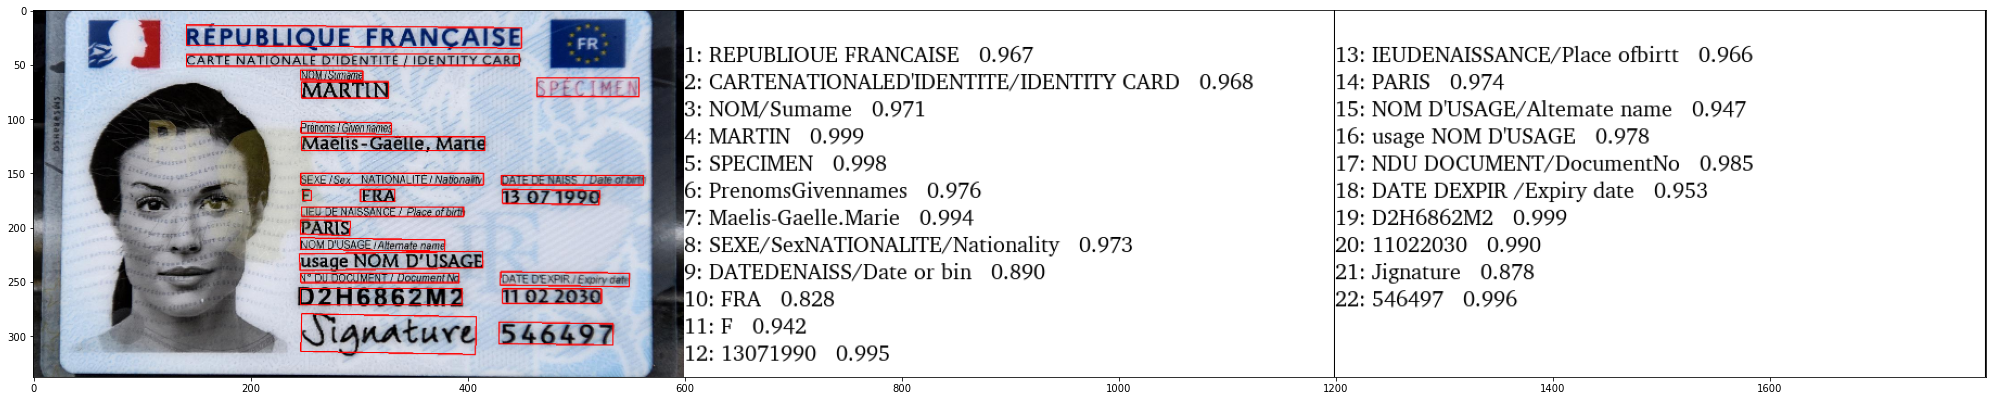

In [12]:
# Viz
plt.figure(figsize=(35,35))

# met les annotations sur le graphique
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 

plt.imshow(annotated) 